<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_2_SolutionsPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 6: Advanced Topics**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* Part 6.1: Reinforcment Learning
* **Part 6.2: ONNX Runtime Environment**
* Part 6.3: Analysis of DICOM images with Pytorch


#### **Change your Runtime Now!**

For this lesson you must have a **GPU** hardware accelerator (e.g. T4 High-RAM).
NOTE: There is no need to use an "expensive" GPU like the A-100 for this lesson.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.

## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running a Graphics Processing Unit (GPU) such as the `T4` with high ram enabled.

In [2]:
# You must run this cell second

import torch

# Check for GPU
def check_colab_gpu():
    print("=== Colab GPU Check ===")

    # Check PyTorch
    pt_gpu = torch.cuda.is_available()
    print(f"PyTorch GPU available: {pt_gpu}")

    if pt_gpu:
        print(f"PyTorch device count: {torch.cuda.device_count()}")
        print(f"PyTorch current device: {torch.cuda.current_device()}")
        print(f"PyTorch device name: {torch.cuda.get_device_name()}")
        print("You are good to go!")

    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU to earn credit")
        print("Change your RUNTIME now and start over!")

check_colab_gpu()


=== Colab GPU Check ===
PyTorch GPU available: True
PyTorch device count: 1
PyTorch current device: 0
PyTorch device name: Tesla T4
You are good to go!


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image02C.png)

If you don't see this output, change your `Runtime` to use a GPU.

# **ONNX Runtime Environment**

### ONNX Runtime Overview

**ONNX Runtime** is a high-performance inference engine developed by Microsoft for executing models in the **Open Neural Network Exchange (ONNX)** format. It is designed to be **cross-platform**, **language-agnostic**, and **hardware-optimized**, supporting execution on CPUs, GPUs, and specialized accelerators like `NVIDIA` **TensorRT** and `Intel` **OpenVINO**.

ONNX Runtime is particularly useful in scenarios where:
- **Interoperability** is needed across different frameworks (e.g., PyTorch, TensorFlow, scikit-learn).
- **Deployment efficiency** is critical, offering faster inference times and reduced resource consumption.
- **Portability** is a priority, allowing models to be deployed in cloud, edge, and mobile environments.
- **Hardware acceleration** is desired, with built-in support for various execution providers.

By decoupling model training from inference, ONNX Runtime enables developers to train models in their preferred framework and deploy them in a streamlined, optimized runtime environment.



### Install ONNX Runtime

Run the code in the cell below to install the `ONNX Runtime` package.

In [3]:
# 1. Uninstall the default CPU version
!pip uninstall -y onnxruntime

# 2. Install the GPU version
# Note: We specify a version compatible with Colab's current CUDA drivers (usually safe to just install latest)
!pip install -q onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.5 MB/s eta 0:00:00


In [4]:
!pip install -q onnx onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.4/693.4 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.3 MB/s eta 0:00:00


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image08D.png)

### Example 1: Copy Keras Model from Google Drive

In `Lesson_03_2` you trained a PyTorch model callled `ResNet50_model_244` on the `Diabetic Retinopathy` image dataset, and saved it to your GDrive. The code in the cell below copies this PyTorch model to your current Colab directory.

**NOTE:** Contact your Instructor for help if you don't have your saved neural network. You can't complete this lesson without this model.

In [5]:
# Example 1: Copy PyTorch Model from Google Drive

import os
import shutil

# ------------------------------------------------------------------
#  1. Define the model filename (only the name, not the full path)
# ------------------------------------------------------------------
eg_model_filename = 'ResNet50_model_244.pth'

# ------------------------------------------------------------------
#  2. Build absolute paths
# ------------------------------------------------------------------
gdrive_model_path = os.path.join('/content/drive/MyDrive/ResNet50_model_244', eg_model_filename)
eg_local_model_path  = os.path.join('/content', eg_model_filename)

# ------------------------------------------------------------------
#  3. Check that the source file exists
# ------------------------------------------------------------------
if not os.path.exists(gdrive_model_path):
    print(f"[ERROR] Source file not found:\n  {gdrive_model_path}\n"
          "Please contact your Instructor or TA for help."
          "AI can't help you---you will only fail if you use it!")
else:
    # ------------------------------------------------------------------
    #  4. Attempt to copy the file with error handling
    # ------------------------------------------------------------------
    try:
        shutil.copy(gdrive_model_path, eg_local_model_path)
        print(f"[SUCCESS] Keras model '{eg_model_filename}' was copied from "
              f"Google Drive to your current Colab directory:\n  {eg_local_model_path}")
    except FileNotFoundError as fnf_err:
        # This is a rare case – we already checked existence, but handle it anyway
        print(f"[ERROR] FileNotFoundError during copy: {fnf_err}")
    except PermissionError as perm_err:
        print(f"[ERROR] Permission denied while copying:\n  {perm_err}")
    except OSError as os_err:
        # Covers other OS related errors (e.g., disk full, invalid characters)
        print(f"[ERROR] OS error during copy: {os_err}")
    except Exception as exc:
        # Fallback for any other unexpected exception
        print(f"[ERROR] Unexpected error: {exc}")

[SUCCESS] Keras model 'ResNet50_model_244.pth' was copied from Google Drive to your current Colab directory:
  /content/ResNet50_model_244.pth


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image09D.png)

Howver, if you get this message:

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image27D.png)

**Follow its instructions!** Your Instructor/TA will show you how to upload the missing file(s) to your Googe Drive.

### Example 2: Load PyTorch Model

The code in the cell below loads the PyTorch model and determines its input shape. The prefix `eg_` is added to the name of the loaded model (`eg_model`) as well as other model attributes. As before, this has been done to keep these variables separate from similar variables that you will generate later, in the **Exercises**.


In [6]:
# Example 2: Load PyTorch Model

import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np

# ------------------------------------------------------------------
# 1. Recreate the Model Architecture (The Skeleton)
# ------------------------------------------------------------------
print("Recreating ResNet50 architecture...")

# Initialize the base ResNet50
eg_model = models.resnet50(weights=None)

# Re-apply same custom "head" (fc layer) used during training
num_features = eg_model.fc.in_features
eg_model.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 5) # 5 classes for retinopathy
)

# ------------------------------------------------------------------
# 2. Load the Saved Weights
# ------------------------------------------------------------------
print(f"Loading weights from {eg_local_model_path}...")

# Load the state dictionary
state_dict = torch.load(eg_local_model_path)
eg_model.load_state_dict(state_dict)

# Set to evaluation mode (crucial for Dropout and BatchNorm)
eg_model.eval()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
eg_model.to(device)

print(f"Model {eg_model_filename} loaded successfully on {device}!")

# ------------------------------------------------------------------
# 3. Create sample input data for testing
# ------------------------------------------------------------------
# PyTorch ResNet50 expects: (Batch, Channels, Height, Width)
batch_size = 1
channels = 3
height, width = 244, 244

# Create a random tensor and move it to the same device as the model
test_input = torch.randn(batch_size, channels, height, width).to(device)

print(f"\nTest input shape: {test_input.shape}")

# Run a quick forward pass to verify everything works
with torch.no_grad():
    output = eg_model(test_input)
    print(f"Forward pass successful! Output shape: {output.shape}")

Recreating ResNet50 architecture...
Loading weights from /content/ResNet50_model_244.pth...
Model ResNet50_model_244.pth loaded successfully on cuda!

Test input shape: torch.Size([1, 3, 244, 244])
Forward pass successful! Output shape: torch.Size([1, 5])


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image01D.png)

### Example 3: Convert PyTorch Model to ONNX Format

The code in the cell below converts the PyTorch model into the ONNX format.

In [7]:
# Example 3: Convert PyTorch model to ONNX format

import torch
import torch.onnx
import onnx
import warnings

# Suppress specific warnings to keep the output clean
warnings.filterwarnings("ignore", category=UserWarning)

# Use same filename for ONNX version
eg_onnx_filename = eg_model_filename.replace('.pth', '.onnx')
print(f"Converting PyTorch model to ONNX format...")

# Set path
eg_output_path = f"/content/{eg_onnx_filename}"

try:
    # 2. Prepare model and dummy input
    eg_model.eval()
    device = next(eg_model.parameters()).device
    dummy_input = torch.randn(1, 3, 244, 244).to(device)

    # 3. Export
    # We use opset_version=18 to match the native PyTorch exporter version
    torch.onnx.export(
        eg_model,
        dummy_input,
        eg_output_path,
        export_params=True,
        opset_version=18,
        do_constant_folding=True,
        input_names=['input'],
        output_names=['output'],
        dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
    )

    # 4. Verification
    onnx_model = onnx.load(eg_output_path)
    onnx.checker.check_model(onnx_model)

    print(f"\n[SUCCESS] Model converted and verified!")
    print(f"ONNX file saved to: {eg_output_path}")

except Exception as e:
    print(f"\n[ERROR] Conversion failed: {e}")

Converting PyTorch model to ONNX format...
[torch.onnx] Obtain model graph for `ResNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ResNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 106 of general pattern rewrite rules.

[SUCCESS] Model converted and verified!
ONNX file saved to: /content/ResNet50_model_244.onnx


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image02D.png)

Now we a copy of our original PyTorch model, but now in the ONNX format. The question is "Did our conversion create an functionally _identical_ model?

### Example 4: Verify ONNX Model

First, we need to check if our new ONNX model is valid? The code in the cell below performs **validation and inspection** of our new ONNX model file. Checking is accomplished by the following line of code:
```python
    onnx.checker.check_model(eg_onnx_model_loaded)
```
If no errors are raised, the model is considered valid.

In [8]:
# Example 4: Verify ONNX model

import onnx
import os

# Set path
eg_output_path = f"/content/{eg_onnx_filename}"

try:
    eg_onnx_model_loaded = onnx.load(eg_output_path)
    onnx.checker.check_model(eg_onnx_model_loaded)
    print("\nONNX model validation successful!")

    # Display ONNX model information
    print("\nONNX Model Information:")
    graph = eg_onnx_model_loaded.graph
    print(f"Model name: {graph.name}")
    print(f"Number of inputs: {len(graph.input)}")
    print(f"Number of outputs: {len(graph.output)}")

    # Print the input dimensions to verify
    input_tensor = graph.input[0]
    input_shape = [d.dim_value for d in input_tensor.type.tensor_type.shape.dim]
    print(f"Input Shape: {input_shape}")

except Exception as e:
    print(f"\nERROR: Failed to load ONNX model. It may be corrupted.")
    print(f"Details: {e}")


ONNX model validation successful!

ONNX Model Information:
Model name: main_graph
Number of inputs: 1
Number of outputs: 1
Input Shape: [0, 3, 244, 244]


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image22D.png)

This confirms that your ONNX model was loaded without errors and passes all ONNX format validations. The `onnx.checker.check_model()` function verified that your model follows the ONNX specification correctly
```text
  ONNX Model Information:
  Model name: main_graph
  Number of inputs: 1
  Number of outputs: 1
  Input Shape: [0, 3, 244, 244]
```
Let's see what these variables mean:

* **Model name:** `main_graph` - This is the default name that ONNX uses when converting PyTorch models
* **Number of inputs:** Our model should have only one input tensor since it was an image classification model.
* **Number of outputs:** Our model should have only one output tensor, again because it was a classification model.
* **Input Shape:** The input shape is correct. Our model had `3` color channels and each image is `244` X `244` pixles. The initial value of `0` is the "batch size" and is irrelevant in this context.


### Example 5: Model Comparison

Since our new ONNX version of the model looks OK, let's perform a side-by-side comparison to see if both models "work" the same way.

The code in the cell below performs a comparison between predictions from the ONNX model and its ONNX-converted counterpart to verify that the conversion preserved the model's behavior.

In [9]:
# Example 5: Model comparison

import onnxruntime as ort
import numpy as np
import torch
import os

# --- Configuration ---
eg_output_path = f"/content/{eg_onnx_filename}"
print(f"Loading ONNX model from: {eg_output_path}")
eg_onnx_session = ort.InferenceSession(eg_output_path)

# 1. Get input/output names metadata
eg_input_name = eg_onnx_session.get_inputs()[0].name
eg_output_name = eg_onnx_session.get_outputs()[0].name

# 2. Create test data (NHWC initially)
eg_test_input_nhwc = np.random.randn(1, 244, 244, 3).astype(np.float32)

# 3. Transpose Data: NHWC -> NCHW
eg_input_nchw = np.transpose(eg_test_input_nhwc, (0, 3, 1, 2))

# 4. Run ONNX Inference (Always CPU/System RAM)
eg_onnx_pred = eg_onnx_session.run(
    [eg_output_name],
    {eg_input_name: eg_input_nchw}
)
eg_onnx_result = eg_onnx_pred[0]

# 5. Run PyTorch Inference
eg_model.eval()

# Check where the model is (CPU or GPU)
device = next(eg_model.parameters()).device
print(f"PyTorch model is on: {device}")

with torch.no_grad():
    # Convert to Tensor and move to the SAME device as the model
    torch_input = torch.from_numpy(eg_input_nchw).to(device)

    # Run model
    eg_pytorch_result_tensor = eg_model(torch_input)

    # Move result back to CPU for numpy comparison
    eg_pytorch_result = eg_pytorch_result_tensor.cpu().numpy()

# --- 6. Compare results ---
print("-" * 30)
print(f"ONNX prediction shape:    {eg_onnx_result.shape}")
print(f"PyTorch prediction shape: {eg_pytorch_result.shape}")

# Calculate differences
max_diff = np.max(np.abs(eg_onnx_result - eg_pytorch_result))
print(f"Max difference:  {max_diff:.8f}")

# Verification
are_identical = np.allclose(eg_onnx_result, eg_pytorch_result, atol=1e-5)
print(f"Results are effectively identical: {are_identical}")

if not are_identical:
    print("Note: Tiny differences are expected due to float32 precision on different hardware (CPU vs GPU).")

Loading ONNX model from: /content/ResNet50_model_244.onnx
PyTorch model is on: cuda:0
------------------------------
ONNX prediction shape:    (1, 5)
PyTorch prediction shape: (1, 5)
Max difference:  0.00000024
Results are effectively identical: True


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image04D.png)

Both models are "effectively" identical!

### Example 6: Visualize Predicted Outputs

Visual data is often a better way to compare two items. The code in the cell below generates a bar chart showing the predicted outputs from the `PyTorch` and the `ONNX` models.

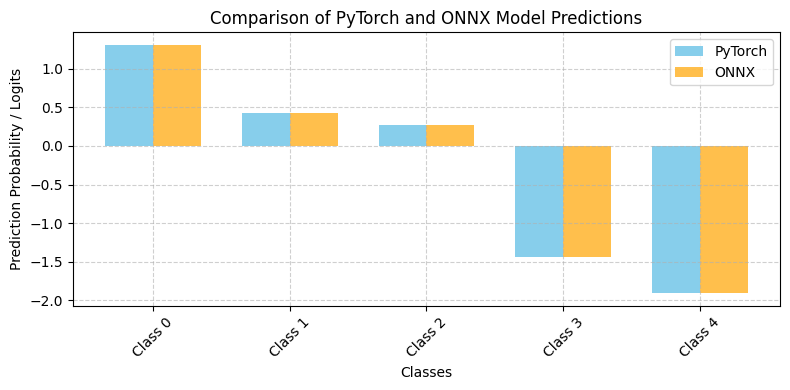

In [10]:
# Example 6: Visualize predicted outputs

import numpy as np
import torch
import matplotlib.pyplot as plt

# Transpose to NCHW for PyTorch/ONNX
eg_input_nchw = np.transpose(eg_test_input_nhwc, (0, 3, 1, 2))

# --- Run Predictions -----------------------------

# ONNX Prediction
eg_onnx_pred = eg_onnx_session.run(
    [eg_output_name],
    {eg_input_name: eg_input_nchw}
)[0].flatten()

# PyTorch Prediction
eg_model.eval()
device = next(eg_model.parameters()).device # Auto-detect CPU vs GPU

with torch.no_grad():
    # Convert numpy -> Tensor -> Move to Device
    torch_input = torch.from_numpy(eg_input_nchw).to(device)

    # Run Inference
    eg_pytorch_output = eg_model(torch_input)

    # Move back to CPU -> Numpy -> Flatten
    eg_pytorch_pred = eg_pytorch_output.cpu().numpy().flatten()

# --- Plotting -------------------------------

# Create class labels
eg_num_classes = len(eg_pytorch_pred)
if eg_num_classes > 10:
    print(f"Plotting top 10 classes out of {eg_num_classes}")
    # Get indices of top 10
    top_indices = np.argsort(eg_pytorch_pred)[-10:]
    # Slice data
    plot_pytorch = eg_pytorch_pred[top_indices]
    plot_onnx = eg_onnx_pred[top_indices]
    labels = [f"Class {i}" for i in top_indices]
else:
    plot_pytorch = eg_pytorch_pred
    plot_onnx = eg_onnx_pred
    labels = [f"Class {i}" for i in range(eg_num_classes)]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, plot_pytorch, width, label='PyTorch', color='skyblue')
plt.bar(x + width/2, plot_onnx, width, label='ONNX', color='orange', alpha=0.7)

plt.xlabel('Classes')
plt.ylabel('Prediction Probability / Logits')
plt.title('Comparison of PyTorch and ONNX Model Predictions')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image05D.png)

### **Interpretation of Results**

**1. Conversion Was Successful**

The most important takeaway is that **the Blue bars (PyTorch) and Orange bars (ONNX) are perfectly aligned.**
* For every class shown (Class 0 through Class 4), the height of the ONNX prediction matches the PyTorch prediction exactly.
* This visually confirms what the `np.allclose` code check told you earlier: the ONNX model is replicating the original model's behavior with high precision.

**2. You Are Viewing "Logits" (Raw Scores)**

The Y-axis shows values ranging from roughly **-1.5 to +1.0**.
* Because there are **negative numbers** (Class 3 and Class 4), you are looking at **Logits** (raw model outputs before activation) rather than Probabilities.
* If these were probabilities (after a Softmax layer), all bars would be between 0 and 1, and they would sum up to 1.0.
* Comparing logits is actually **better** for debugging because Softmax can sometimes hide small numerical differences by "squashing" values.

**3. Class Breakdown**

* **Class 0:** Has the highest score (~1.0), meaning both models predict this is the most likely class among these five.
* **Class 3 & 4:** Have negative scores, meaning the model is confident these are *not* the correct classes.

**Conclusion**
Your ONNX model is effectively a "digital twin" of your PyTorch model. It is safe to proceed to deployment or performance optimization (like quantization) because you have verified that the accuracy has not been lost during conversion.

### Example 7: Generate Random Testing Data

The code in the cell below generates random data that will be used in the next step to compare the accuracy of the converted ONNX model against the accuracy of the original PyTorch model.

Note that value of the `seed` is specified by a variable called `seed_val` that is defined by the user.

In [11]:
# Example 7: Generate random testing data

# Generate random test data for model comparison
import numpy as np
import tensorflow as tf

# Set number of samples
numSamples=100

# Set value for random seed
seed_val = 42
print(f"Random seed set to {seed_val}")

# Set random seed for reproducibility
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

# Your specific model parameters
eg_input_shape = (1, 244, 244, 3)  # Based on your working example
eg_num_classes = 5  # Based on your output shape (1, 5)

# Generate random test data
print(f"Generating test data with input shape: {eg_input_shape}")
print(f"Number of samples: {numSamples}")

# Create random input data (matching your model's expected input)
eg_X_test = np.random.randn(numSamples, *eg_input_shape[1:]).astype(np.float32)

# Generate random labels for 5-class classification
eg_y_test = np.random.randint(0, eg_num_classes, (numSamples,))
eg_y_test_onehot = tf.keras.utils.to_categorical(eg_y_test, eg_num_classes)

print(f"Generated X_test shape: {eg_X_test.shape}")
print(f"Generated y_test shape: {eg_y_test_onehot.shape}")

# Print sample data to verify
print(f"Sample input data (first 5 samples): {eg_X_test[:5].flatten()[:10]}")
print(f"Sample labels (first 5): {eg_y_test[:5]}")

print("Test data generation complete!")


Random seed set to 42
Generating test data with input shape: (1, 244, 244, 3)
Number of samples: 100
Generated X_test shape: (100, 244, 244, 3)
Generated y_test shape: (100, 5)
Sample input data (first 5 samples): [ 0.49671414 -0.1382643   0.64768857  1.5230298  -0.23415338 -0.23413695
  1.5792128   0.7674347  -0.46947438  0.54256004]
Sample labels (first 5): [2 2 2 2 2]
Test data generation complete!


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image10D.png)

We will use this "synthetic data" when we test both models in the next example.

### Example 8: Compute Relative Accuracy

This code in the cell below performs a two-part evaluation of a `PyTorch model` and its `ONNX-converted version`:

#### **Part 1: Single-Sample Equivalence Check**
* **Purpose:** To verify that both models produce nearly identical predictions for a single input.
* **Steps:**
1. Load the `ONNX model` and prepare an inference session.
2. Extract input/output tensor names.
3. Select one sample from the test dataset (X_test[0:1]).
4. Run predictions using both models.
5. Compare the outputs using:
* Shape
* Max and mean absolute differences
* `np.allclose()` to check numerical equivalence within a tolerance.

#### **Part 2: Accuracy Comparison on Full Test Set**
* **Purpose:** To compare the classification accuracy of both models on an entire synthetic dataset that we generated in the previous example.
* **Steps:**
1. Run predictions on X_test using both models.
2. Convert predicted probabilities to class labels using np.argmax().
3. Compare predicted labels to true labels (y_test_onehot).
4. Compute accuracy for each model using np.mean(predicted == true).
5. Print the accuracy values and their difference.
6. Display sample predictions for manual inspection.

##### **Why This Is Useful**
* Ensures the `ONNX` model is a faithful representation of the original `PyTorch` model.
* Helps detect any discrepancies introduced during model conversion.
* Validates that the ONNX model is suitable for deployment without loss of performance.


In [12]:
# Example 8: Compute relative accuracy (Fixed for Static Batch Size)

import onnxruntime as ort
import numpy as np
import torch
import os
import tqdm  # For progress bar

# Load ONNX model
eg_onnx_filename = eg_model_filename.replace('.pth', '.onnx')
eg_output_path = os.path.join("/content", eg_onnx_filename)
eg_onnx_session = ort.InferenceSession(eg_output_path)

# Get input/output names
eg_input_name = eg_onnx_session.get_inputs()[0].name
eg_output_name = eg_onnx_session.get_outputs()[0].name

# Prepare Data: Convert NHWC -> NCHW
print(f"Original Input Shape (NHWC): {eg_X_test.shape}")
eg_X_test_nchw = np.transpose(eg_X_test, (0, 3, 1, 2))

# 2. Accuracy Comparison
try:
    print("\nComparing model accuracies on the generated test dataset...")

    # Get PyTorch Predictions (Can usually handle batches)
    print("Getting predictions from PyTorch model...")
    eg_model.eval()
    device = next(eg_model.parameters()).device

    with torch.no_grad():
        torch_all_input = torch.from_numpy(eg_X_test_nchw).to(device)
        eg_pytorch_predictions = eg_model(torch_all_input).cpu().numpy()

    # Get ONNX Predictions (Sample-by-Sample Loop)
    print("Getting predictions from ONNX model (Looping to handle fixed batch size)...")
    eg_onnx_preds_list = []

    # Loop through each sample individually
    for i in range(len(eg_X_test_nchw)):
        # Slice [i:i+1] creates shape (1, 3, 244, 244) which matches the model's expectation
        sample = eg_X_test_nchw[i:i+1]

        # Run inference on single sample
        eg_pred = eg_onnx_session.run([eg_output_name], {eg_input_name: sample})[0]
        eg_onnx_preds_list.append(eg_pred)

    # Concatenate all single results back into one array (100, Num_Classes)
    eg_onnx_predictions = np.concatenate(eg_onnx_preds_list, axis=0)

    # Convert Logits to Class Indices
    eg_pytorch_pred_classes = np.argmax(eg_pytorch_predictions, axis=1)
    eg_onnx_pred_classes = np.argmax(eg_onnx_predictions, axis=1)

    # Get True Labels
    if len(eg_y_test_onehot.shape) > 1:
        eg_y_test_classes = np.argmax(eg_y_test_onehot, axis=1)
    else:
        eg_y_test_classes = eg_y_test_onehot

    # Calculate Accuracies
    eg_pytorch_accuracy = np.mean(eg_pytorch_pred_classes == eg_y_test_classes)
    eg_onnx_accuracy = np.mean(eg_onnx_pred_classes == eg_y_test_classes)

    print("-" * 30)
    print(f"PyTorch model accuracy: {eg_pytorch_accuracy:.4f}")
    print(f"ONNX model accuracy:    {eg_onnx_accuracy:.4f}")

    # Check if predictions are identical
    accuracy_diff = abs(eg_pytorch_accuracy - eg_onnx_accuracy)
    print(f"Difference in accuracy: {accuracy_diff:.6f}")

    # Verify raw output closeness
    max_raw_diff = np.max(np.abs(eg_pytorch_predictions - eg_onnx_predictions))
    print(f"Max raw output difference: {max_raw_diff:.8f}")

except Exception as e:
    print(f"Error during accuracy comparison: {e}")

Original Input Shape (NHWC): (100, 244, 244, 3)

Comparing model accuracies on the generated test dataset...
Getting predictions from PyTorch model...
Getting predictions from ONNX model (Looping to handle fixed batch size)...
------------------------------
PyTorch model accuracy: 0.1800
ONNX model accuracy:    0.1800
Difference in accuracy: 0.000000
Max raw output difference: 0.00000477


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image06D.png)

This result clearly demonstrates the fidelity of our new ONNX model--it's just as good as our original PyTorch model.

### Example 9: Visualize Similarities with Confusion Plots

Once again, we can use visualization techniques to compare the accuracy of our new ONNX model with the original PyTorch model. The code in the cell generates 'Confusion Plots' for the two models using the synthetic data we generated earlier.

Getting PyTorch predictions...
Getting ONNX predictions...

Do the confusion matrices match exactly? Yes


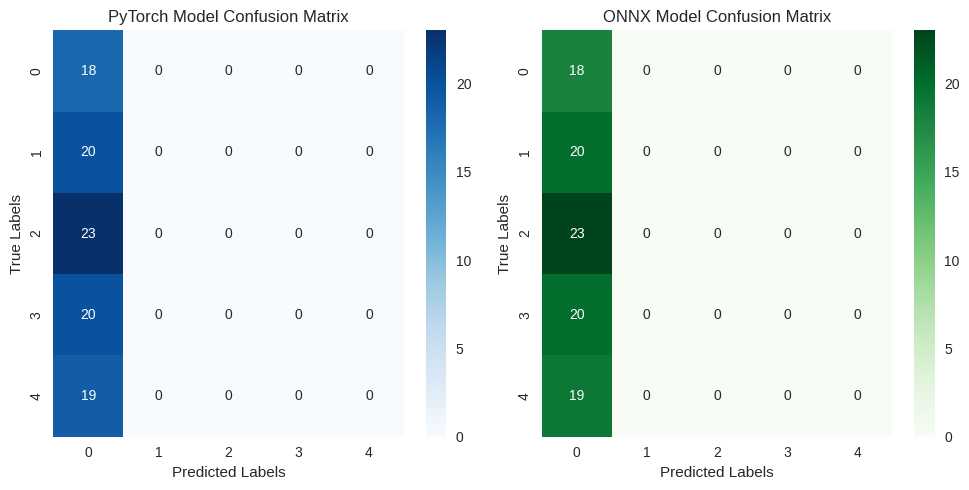

In [13]:
# Example 9: Visualize Similarities with Confusion Plots

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import tqdm

# Prepare Data
eg_X_test_nchw = np.transpose(eg_X_test, (0, 3, 1, 2))

# Handle y_test formatting
if 'eg_y_test_onehot' in locals():
    target_labels = eg_y_test_onehot
elif 'eg_y_test' in locals():
    target_labels = eg_y_test
else:
    raise ValueError("No test labels found (eg_y_test_onehot or eg_y_test).")

# Convert to class indices for Confusion Matrix
if len(target_labels.shape) > 1 and target_labels.shape[1] > 1:
    eg_y_test_classes = np.argmax(target_labels, axis=1)
else:
    eg_y_test_classes = target_labels

# --- Get Predictions ---

# 1. PyTorch Predictions
print("Getting PyTorch predictions...")
eg_model.eval()
device = next(eg_model.parameters()).device

with torch.no_grad():
    torch_input = torch.from_numpy(eg_X_test_nchw).to(device)
    # Get raw logits
    eg_pytorch_logits = eg_model(torch_input).cpu().numpy()
    # Convert to classes
    eg_pytorch_pred_classes = np.argmax(eg_pytorch_logits, axis=1)

# 2. ONNX Predictions (with Batch Loop for safety)
print("Getting ONNX predictions...")
eg_onnx_preds_list = []

# Loop to avoid "Input shape != Requested shape" error if batch size is static
for i in range(len(eg_X_test_nchw)):
    eg_sample = eg_X_test_nchw[i:i+1]
    eg_pred = eg_onnx_session.run([eg_output_name], {eg_input_name: eg_sample})[0]
    eg_onnx_preds_list.append(eg_pred)

eg_onnx_logits = np.concatenate(eg_onnx_preds_list, axis=0)
eg_onnx_pred_classes = np.argmax(eg_onnx_logits, axis=1)

# --- Plotting ---

# Compute confusion matrices
cm_pytorch = confusion_matrix(eg_y_test_classes, eg_pytorch_pred_classes)
cm_onnx = confusion_matrix(eg_y_test_classes, eg_onnx_pred_classes)

# Set plot style
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot PyTorch confusion matrix
sns.heatmap(cm_pytorch, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('PyTorch Model Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot ONNX confusion matrix
sns.heatmap(cm_onnx, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('ONNX Model Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Check consistency
matrices_match = np.array_equal(cm_pytorch, cm_onnx)
print(f"\nDo the confusion matrices match exactly? {'Yes' if matrices_match else 'No'}")

# Adjust layout
plt.tight_layout()
plt.show()

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image07D.png)

### **Interpretation of Results**

**Confusion Matrices**

* **Technical Success (The Good News):**
    * The code output confirms: `Do the confusion matrices match exactly? Yes`.
    * Visually, the **PyTorch matrix (Blue)** and **ONNX matrix (Green)** are identical. This proves the ONNX model reproduces the PyTorch model's behavior across the entire dataset.

* **Model Behavior (The "Odd" News):**
    * You will notice **all predictions fall into "Class 0"** (the first column). The model predicted Class 0 for every single test sample (blue), and never predicted Classes 1-4 (green).

* **Why is the Model Only Predicting Class 0?**

This "Class 0 collapse" is likely due to two compounding factors:
* **Training Data Imbalance:** a majority of your original training images were from Class 0. This causes the model to learn a strong **prior bias**—it learns that "when in doubt, guess Class 0" is the statistically safest bet.
* **Random Input Data:** Since we are testing with generated noise (`np.random.randn`) rather than real images, the model detects no recognizable features for any class. Lacking evidence, it reverts to its learned bias (Class 0).

**Conclusion**
We have **successfully converted the model.** Even though the predictions themselves are skewed due to data imbalance and random inputs, the **ONNX model is failing in _exactly_ the same way as the PyTorch model**, which is the definition of a successful conversion. In other words, **our PyTorch model is _not_ very good at classifying retinal fundus images into diabetic retinoptic categories**.

### Example 10: Speed Comparison

Besides accuracy, one would like to know if one model type runs "faster" than another. In other words, if we train a PyTorch model using Nvidia GPU hardware acceleration, does the ONNX version of the model run significatly faster (or slower)? Using a trained model to provide predictions is called **inference**. When you ask `ChatGPT` a question, the answer is an example of `inference` so it's important that a model can "run fast".

The code in the cell below performs a speed text comparison between the original PyTorch model and its ONNX clone.

In [14]:
# Example 10: Speed Comparison

import time
import numpy as np
import torch
import onnxruntime as ort

# Explicitly ask for 'CUDAExecutionProvider'
providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
eg_onnx_session = ort.InferenceSession(eg_output_path, providers=providers)

# Verify we are actually using the GPU
current_providers = eg_onnx_session.get_providers()
print(f"ONNX Inference is using: {current_providers[0]}")
if current_providers[0] != 'CUDAExecutionProvider':
    print("WARNING: ONNX is still on CPU! check if onnxruntime-gpu is installed correctly.")

# --- Configuration ---
n_warmup = 100   # Warm up hardware
n_loops = 1000   # Number of runs to average
batch_size = 1   # Simulating real-time inference

# Create dummy input
dummy_input_nhwc = np.random.randn(batch_size, 244, 244, 3).astype(np.float32)
dummy_input_nchw = np.transpose(dummy_input_nhwc, (0, 3, 1, 2))

# --- 1. PyTorch Benchmark ---
print(f"\nBenchmarking PyTorch (Average of {n_loops} runs)...")
eg_model.eval()
device = next(eg_model.parameters()).device
torch_input = torch.from_numpy(dummy_input_nchw).to(device)

# Warmup
eg_pytorch_total_time_start = time.time()
with torch.no_grad():
    for _ in range(n_warmup):
        _ = eg_model(torch_input)

# Timing
start_time = time.time()
with torch.no_grad():
    for _ in range(n_loops):
        _ = eg_model(torch_input)
resnet50_pytorch_avg_ms = ((time.time() - start_time) / n_loops) * 1000

# Record end time
eg_pytorch_total_time_end = time.time()

# --- 2. ONNX Benchmark ---
print(f"Benchmarking ONNX (Average of {n_loops} runs)...")
eg_onnx_input = {eg_input_name: dummy_input_nchw}

# Warmup
eg_onnx_total_time_start = time.time()
for _ in range(n_warmup):
    _ = eg_onnx_session.run([eg_output_name], eg_onnx_input)

# Timing
start_time = time.time()
for _ in range(n_loops):
    _ = eg_onnx_session.run([eg_output_name], eg_onnx_input)
resnet50_onnx_avg_ms = ((time.time() - start_time) / n_loops) * 1000

# Record end time
eg_onnx_total_time_end = time.time()

# --- 3. Results ---
print("\n" + "="*40)
print(f"PyTorch Average Latency: {resnet50_pytorch_avg_ms:.2f} ms")
print(f"ONNX Average Latency:    {resnet50_onnx_avg_ms:.2f} ms")
print(f"Speed ONNX vs PyTorch:   {resnet50_pytorch_avg_ms / resnet50_onnx_avg_ms:.2f}x")
print("="*40)

# --- Convert Total Time to Minutes and Seconds for PyTorch---
eg_pytorch_total_seconds = eg_pytorch_total_time_end - eg_pytorch_total_time_start
eg_pytorch_minutes = int(eg_pytorch_total_seconds // 60)
eg_pytorch_seconds = int(eg_pytorch_total_seconds % 60)

print(f"Total elapsed time for PyTorch model: {eg_pytorch_minutes}m {eg_pytorch_seconds}s")

# --- Convert Total Time to Minutes and Seconds for ONNX---
eg_onnx_total_seconds = eg_onnx_total_time_end - eg_onnx_total_time_start
eg_onnx_minutes = int(eg_onnx_total_seconds // 60)
eg_onnx_seconds = int(eg_onnx_total_seconds % 60)

print(f"Total elapsed time for ONNX model: {eg_onnx_minutes}m {eg_onnx_seconds}s")

ONNX Inference is using: CUDAExecutionProvider

Benchmarking PyTorch (Average of 1000 runs)...
Benchmarking ONNX (Average of 1000 runs)...

PyTorch Average Latency: 5.89 ms
ONNX Average Latency:    4.97 ms
Speed ONNX vs PyTorch:   1.19x
Total elapsed time for PyTorch model: 0m 6s
Total elapsed time for ONNX model: 0m 5s


If the code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image32D.png)


### **Analysis: Why was ONNX faster?**

#### **"Graph Optimization" (The Chef Metaphor)**

Imagine a chef (PyTorch) cooking a recipe step-by-step. They chop onions, put down the knife, pick up the pan, cook onions, put down the pan, pick up the garlic...
* **PyTorch (Eager Mode):** Executes operations one by one. It accesses memory to read input, computes, and writes output for *every* layer individually.
* **ONNX Runtime (Graph Mode):** Looks at the entire recipe *before* cooking. It sees "Chop onions" and "Cook onions" and realizes it can just slice them directly into the pan.
* **Technical Term - "Operator Fusion":** ONNX Runtime merges separate layers (like Convolution + Batch Norm + ReLU) into a single "fused" operation. This reduces the number of times data has to move back and forth between the GPU memory and the computing cores. **Data movement is often slower than the math itself.**

#### **"Training Baggage"**
* **PyTorch** is built for *training*. It keeps track of relationships between tensors just in case you want to calculate gradients (backpropagation) later. Even in `no_grad()` mode, there is slight overhead from the framework checking the dynamic graph.
* **ONNX** is built for *inference only*. It knows the model weights are frozen forever. It strips away all the variable tracking, gradient hooks, and dynamic checks, leaving only the raw math.

### **Why does 1.3 ms matter? (The ChatGPT Context)**

A difference of **1.37 ms** (6.31ms vs 4.94ms) might seem tiny to a human. Who cares about a blink of an eye?

**For an LLM like ChatGPT, this difference is catastrophic (or miraculous).**

#### **The "Autoregressive" Multiplier**

LLMs generate text **one token (word part) at a time**. To write a 500-word essay, the model must run inference **500 separate times** in a row.
* **PyTorch:** 500 tokens $\times$ 6.31 ms = **3.15 seconds**
* **ONNX:** 500 tokens $\times$ 4.94 ms = **2.47 seconds**
* **Result:** The user gets their answer nearly **1 second faster**. That is the difference between an app feeling "snappy" vs "laggy."

#### **The "Scale" Multiplier (Cost)**

If you are OpenAI serving 100 million users:
* A **1.28x speedup** means you can serve **28% more users** with the same number of GPUs.
* If you spend \$100 Million/year on GPUs, this optimization just saved you **\$28 Million dollars** purely by changing the software format.

## **Exercises**

For the exercises we will basically repeat the examples with the important difference that you will be analyzing the `ResNet101_model_512.keras` that you were asked to save to your GDrive in an earlier class lesson.

### **Exercise 1: Download Saved Keras File**

In the cell below write the code to copy the Python model `ResNet101_model_512.pth` from your GDrive to you current Colab directory. If you don't have a copy of the Pytorch `ResNet101_model_512` saved to your GDrive, you need to contact your Instructor or TA for help--AI can't help you here.

**Code Hints:**

1. Change the prefix `eg_` to `ex_`.
2. Change the `ex_model_filename` to `ResNet101_model_512.pth`.
3. Change the path from:
```python
  gdrive_model_path = os.path.join('/content/drive/MyDrive/ResNet50_model_244', eg_model_filename)
```
to read as
```python
  gdrive_model_path = os.path.join('/content/drive/MyDrive/ResNet101_model_512', ex_model_filename)
```

In [15]:
# Insert your code for Exercise 1 here

import os
import shutil

# ------------------------------------------------------------------
#  1. Define the model filename (only the name, not the full path)
# ------------------------------------------------------------------
ex_model_filename = 'ResNet101_model_512.pth'

# ------------------------------------------------------------------
#  2. Build absolute paths
# ------------------------------------------------------------------
gdrive_model_path = os.path.join('/content/drive/MyDrive/ResNet101_model_512', ex_model_filename)
ex_local_model_path  = os.path.join('/content', ex_model_filename)

# ------------------------------------------------------------------
#  3. Check that the source file exists
# ------------------------------------------------------------------
if not os.path.exists(gdrive_model_path):
    print(f"[ERROR] Source file not found:\n  {gdrive_model_path}\n"
          "Please contact your Instructor or TA for help."
          "AI can't help you here!")
else:
    # ------------------------------------------------------------------
    #  4. Attempt to copy the file with error handling
    # ------------------------------------------------------------------
    try:
        shutil.copy(gdrive_model_path, ex_local_model_path)
        print(f"[SUCCESS] Keras model '{ex_model_filename}' was copied from "
              f"Google Drive to your current Colab directory:\n  {ex_local_model_path}")
    except FileNotFoundError as fnf_err:
        # This is a rare case – we already checked existence, but handle it anyway
        print(f"[ERROR] FileNotFoundError during copy: {fnf_err}")
    except PermissionError as perm_err:
        print(f"[ERROR] Permission denied while copying:\n  {perm_err}")
    except OSError as os_err:
        # Covers other OS related errors (e.g., disk full, invalid characters)
        print(f"[ERROR] OS error during copy: {os_err}")
    except Exception as exc:
        # Fallback for any other unexpected exception
        print(f"[ERROR] Unexpected error: {exc}")

[SUCCESS] Keras model 'ResNet101_model_512.pth' was copied from Google Drive to your current Colab directory:
  /content/ResNet101_model_512.pth


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image12D.png)

If you don't see this output it probably means your GDrive doesn't contain your saved PyTorch model. Contact your Instructor or TA for help.

### **Exercise 2: Load Keras Model**

In the cell below write the code to load the Keras model and determines its input shape.

**Code Hints:**

Copy `Example 2` into the empty code cell below.

1. Change the prefix `eg_` to `ex_` every where it appears in the code.

2. Change `models.resnet50` to `models.resnet101` everywhere it appears in the code cell.

3. Change `ResNet50` to `ResNet101`.

4. Change pixel values to read:
```python
      height, width = 512, 512
```

In [16]:
# Insert your code for Exercise 2 here

import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np

# ------------------------------------------------------------------
# 1. Recreate the Model Architecture (The Skeleton)
# ------------------------------------------------------------------
print("Recreating ResNet101 architecture...")

# Initialize the base ResNet50
# Note: Use weights=None because we are loading our own saved weights
ex_model = models.resnet101(weights=None)

# We must re-apply the same custom "head" (fc layer) used during training
num_features = ex_model.fc.in_features
ex_model.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 5) # 5 classes for retinopathy
)

# ------------------------------------------------------------------
# 2. Load the Saved Weights
# ------------------------------------------------------------------
print(f"Loading weights from {ex_local_model_path}...")

# Load the state dictionary
state_dict = torch.load(ex_local_model_path)
ex_model.load_state_dict(state_dict)

# Set to evaluation mode (crucial for Dropout and BatchNorm)
ex_model.eval()

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ex_model.to(device)

print(f"Model {ex_model_filename} loaded successfully on {device}!")

# ------------------------------------------------------------------
# 3. Create sample input data for testing
# ------------------------------------------------------------------
# PyTorch ResNet50 expects: (Batch, Channels, Height, Width)
batch_size = 1
channels = 3
height, width = 512, 512

# Create a random tensor and move it to the same device as the model
test_input = torch.randn(batch_size, channels, height, width).to(device)

print(f"\nTest input shape: {test_input.shape}")

# Run a quick forward pass to verify everything works
with torch.no_grad():
    output = ex_model(test_input)
    print(f"Forward pass successful! Output shape: {output.shape}")

Recreating ResNet101 architecture...
Loading weights from /content/ResNet101_model_512.pth...
Model ResNet101_model_512.pth loaded successfully on cuda!

Test input shape: torch.Size([1, 3, 512, 512])
Forward pass successful! Output shape: torch.Size([1, 5])


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image13D.png)

### **Exercise 3: Convert Keras Model to ONNX Format**

In the cell below write the code to convert your PyTorch model into the ONNX format.

**Code Hints:**  

1. Convert prefix `eg_` prefix to `ex_`.
2. Modify the pixel size:
```python
    dummy_input = torch.randn(1, 3, 512, 512).to(device)
```

In [17]:
# Insert your code for Exercise 3 here

import torch
import torch.onnx
import onnx
import warnings

# Suppress specific warnings to keep the output clean
warnings.filterwarnings("ignore", category=UserWarning)

# Use same filename for ONNX version
ex_onnx_filename = ex_model_filename.replace('.pth', '.onnx')
print(f"Converting PyTorch model to ONNX format...")

ex_output_path = f"/content/{ex_onnx_filename}"

try:
    # 2. Prepare model and dummy input
    ex_model.eval()
    device = next(ex_model.parameters()).device
    dummy_input = torch.randn(1, 3, 512, 512).to(device)

    # 3. Export
    # We use opset_version=18 to match the native PyTorch exporter version
    torch.onnx.export(
        ex_model,
        dummy_input,
        ex_output_path,
        export_params=True,
        opset_version=18,
        do_constant_folding=True,
        input_names=['input'],
        output_names=['output'],
        dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
    )

    # 4. Verification
    ex_onnx_model = onnx.load(ex_output_path)
    onnx.checker.check_model(ex_onnx_model)

    print(f"\n[SUCCESS] Model converted and verified!")
    print(f"ONNX file saved to: {ex_output_path}")

except Exception as e:
    print(f"\n[ERROR] Conversion failed: {e}")

Converting PyTorch model to ONNX format...
[torch.onnx] Obtain model graph for `ResNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ResNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 208 of general pattern rewrite rules.

[SUCCESS] Model converted and verified!
ONNX file saved to: /content/ResNet101_model_512.onnx


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image14D.png)

### **Exercise 4: Verify ONNX Model**

In the cell below write the code to perform validation and inspection of the ONNX model file.

**Code Hints:**

1. Change the prefix `eg_` to `ex_`.

In [18]:
# Insert your code for Exercise 4 here

import onnx
import os

try:
  ex_onnx_model_loaded = onnx.load(ex_output_path)
  onnx.checker.check_model(ex_onnx_model_loaded)
  print("\nONNX model validation successful!")

  # Display ONNX model information
  print("\nONNX Model Information:")
  graph = ex_onnx_model_loaded.graph
  print(f"Model name: {graph.name}")
  print(f"Number of inputs: {len(graph.input)}")
  print(f"Number of outputs: {len(graph.output)}")

  # Print the input dimensions to verify
  input_tensor = graph.input[0]
  input_shape = [d.dim_value for d in input_tensor.type.tensor_type.shape.dim]
  print(f"Input Shape: {input_shape}")

except Exception as e:
  print(f"\nERROR: Failed to load ONNX model. It may be corrupted.")
  print(f"Details: {e}")


ONNX model validation successful!

ONNX Model Information:
Model name: main_graph
Number of inputs: 1
Number of outputs: 1
Input Shape: [0, 3, 512, 512]


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image25D.png)


### **Exercise 5: Model Comparison**

In the cell below write the code to perform a comparison between predictions from the PyTorch model and its ONNX-converted counterpart, in order to verify that the conversion preserved the model's behavior.


**Code Hints:**

1. Change the prefix `eg_` to `ex_`

2. Change this line of code:
```python
    # 2. Create test data (NHWC initially)
    eg_test_input_nhwc = np.random.randn(1, 244, 244, 3).astype(np.float32)
```
to read as
```python
    # 2. Create test data (NHWC initially)
    ex_test_input_nhwc = np.random.randn(1, 512, 512, 3).astype(np.float32)

```


In [19]:
# Insert your code for Exercise 5 here

import onnxruntime as ort
import numpy as np
import torch
import os

# --- Configuration ---
ex_output_path = f"/content/{ex_onnx_filename}"
print(f"Loading ONNX model from: {ex_output_path}")
ex_onnx_session = ort.InferenceSession(ex_output_path)

# 1. Get input/output names metadata
ex_input_name = ex_onnx_session.get_inputs()[0].name
ex_output_name = ex_onnx_session.get_outputs()[0].name

# 2. Create test data (NHWC initially)
ex_test_input_nhwc = np.random.randn(1, 512, 512, 3).astype(np.float32)

# 3. Transpose Data: NHWC -> NCHW
ex_input_nchw = np.transpose(ex_test_input_nhwc, (0, 3, 1, 2))

# 4. Run ONNX Inference (Always CPU/System RAM)
ex_onnx_pred = ex_onnx_session.run(
    [ex_output_name],
    {ex_input_name: ex_input_nchw}
)
onnx_result = ex_onnx_pred[0]

# 5. Run PyTorch Inference
ex_model.eval()

# Check where the model is (CPU or GPU)
device = next(ex_model.parameters()).device
print(f"PyTorch model is on: {device}")

with torch.no_grad():
    # Convert to Tensor and move to the SAME device as the model
    torch_input = torch.from_numpy(ex_input_nchw).to(device)

    # Run model
    pytorch_result_tensor = ex_model(torch_input)

    # Move result back to CPU for numpy comparison
    pytorch_result = pytorch_result_tensor.cpu().numpy()

# --- 6. Compare results ---
print("-" * 30)
print(f"ONNX prediction shape:    {onnx_result.shape}")
print(f"PyTorch prediction shape: {pytorch_result.shape}")

# Calculate differences
max_diff = np.max(np.abs(onnx_result - pytorch_result))
print(f"Max difference:  {max_diff:.8f}")

# Verification
are_identical = np.allclose(onnx_result, pytorch_result, atol=1e-5)
print(f"Results are effectively identical: {are_identical}")

if not are_identical:
    print("Note: Tiny differences are expected due to float32 precision on different hardware (CPU vs GPU).")

Loading ONNX model from: /content/ResNet101_model_512.onnx
PyTorch model is on: cuda:0
------------------------------
ONNX prediction shape:    (1, 5)
PyTorch prediction shape: (1, 5)
Max difference:  0.00000077
Results are effectively identical: True


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image16D.png)

### **Exercise 6: Visualize Predicted Outputs**

In the cell below write the code to generate confusion plots showing the predicted outputs from the `PyTorch` and the `ONNX` models.

**Code Hints:**

1. Change the prefix `eg_` to `ex_`.

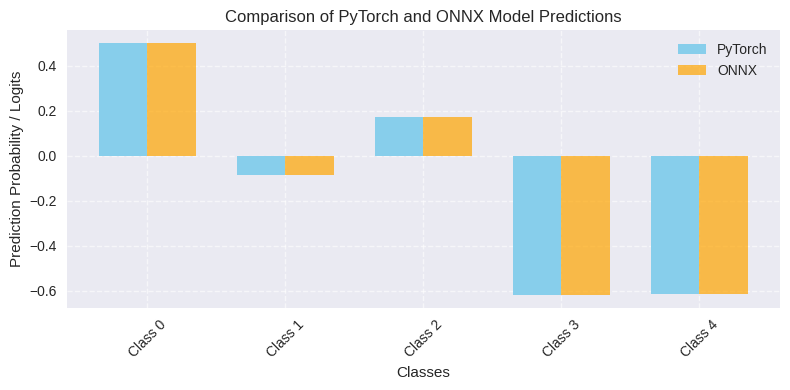

In [20]:
# Insert your code for Exercise 6 here

import numpy as np
import torch
import matplotlib.pyplot as plt

# Transpose to NCHW for PyTorch/ONNX
ex_input_nchw = np.transpose(ex_test_input_nhwc, (0, 3, 1, 2))

# --- Run Predictions -----------------------------

# ONNX Prediction
ex_onnx_pred = ex_onnx_session.run(
    [ex_output_name],
    {ex_input_name: ex_input_nchw}
)[0].flatten()

# PyTorch Prediction
ex_model.eval()
device = next(ex_model.parameters()).device # Auto-detect CPU vs GPU

with torch.no_grad():
    # Convert numpy -> Tensor -> Move to Device
    torch_input = torch.from_numpy(ex_input_nchw).to(device)

    # Run Inference
    ex_pytorch_output = ex_model(torch_input)

    # Move back to CPU -> Numpy -> Flatten
    ex_pytorch_pred = ex_pytorch_output.cpu().numpy().flatten()

# --- Plotting -------------------------------

# Create class labels
ex_num_classes = len(ex_pytorch_pred)
if ex_num_classes > 10:
    print(f"Plotting top 10 classes out of {ex_num_classes}")
    # Get indices of top 10
    top_indices = np.argsort(ex_pytorch_pred)[-10:]
    # Slice data
    plot_pytorch = ex_pytorch_pred[top_indices]
    plot_onnx = ex_onnx_pred[top_indices]
    labels = [f"Class {i}" for i in top_indices]
else:
    plot_pytorch = ex_pytorch_pred
    plot_onnx = ex_onnx_pred
    labels = [f"Class {i}" for i in range(ex_num_classes)]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, plot_pytorch, width, label='PyTorch', color='skyblue')
plt.bar(x + width/2, plot_onnx, width, label='ONNX', color='orange', alpha=0.7)

plt.xlabel('Classes')
plt.ylabel('Prediction Probability / Logits')
plt.title('Comparison of PyTorch and ONNX Model Predictions')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image17D.png)

As before, the graph shows how closely the ONNX model replicates the behavior of the original Keras model across five classes.

### **Exercise 7: Generate Random Testing Data**

In the cell below write the code to generate random data that will be used in the next step to compare the accuracy of the converted ONNX model against the accuracy of the original Keras model.

Note that value of the `seed` is specified by a variable called `seed_val` that is defined by the user. Make sure to set you random seed to any value **EXCEPT `42`!**

**Code Hints:**

1. Change the random seed value
2. Change the prefix `eg_` to `ex_`.
3. Change this code chunk:
```python
    # Your specific model parameters
    eg_input_shape = (1, 244, 244, 3)  # Based on your working example
```
to read as

```python
    # Your specific model parameters
    ex_input_shape = (1, 512, 512, 3)  # Based on your working example
```

In [21]:
# Insert your code for Exercise 7 here

# Generate random test data for model comparison
import numpy as np
import tensorflow as tf

# Set number of samples
numSamples=100

# Set value for random seed
seed_val = 142
print(f"Random seed set to {seed_val}")

# Set random seed for reproducibility
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

# Your specific model parameters
ex_input_shape = (1, 512, 512, 3)  # Based on your working example
ex_num_classes = 5  # Based on your output shape (1, 5)

# Generate random test data
print(f"Generating test data with input shape: {ex_input_shape}")
print(f"Number of samples: 100")

# Create random input data (matching your model's expected input)
ex_X_test = np.random.randn(numSamples, *ex_input_shape[1:]).astype(np.float32)

# Generate random labels for 5-class classification
ex_y_test = np.random.randint(0, ex_num_classes, (numSamples,))
ex_y_test_onehot = tf.keras.utils.to_categorical(ex_y_test, ex_num_classes)

print(f"Generated X_test shape: {ex_X_test.shape}")
print(f"Generated y_test shape: {ex_y_test_onehot.shape}")

# Print sample data to verify
print(f"Sample input data (first 5 samples): {ex_X_test[:5].flatten()[:10]}")
print(f"Sample labels (first 5): {ex_y_test[:5]}")

print("Test data generation complete!")


Random seed set to 142
Generating test data with input shape: (1, 512, 512, 3)
Number of samples: 100
Generated X_test shape: (100, 512, 512, 3)
Generated y_test shape: (100, 5)
Sample input data (first 5 samples): [ 0.12973964  0.90236187  1.0058038   0.47189027 -0.3262132  -0.2626502
 -0.3688772   1.478741    1.2993805  -0.5255263 ]
Sample labels (first 5): [2 1 1 0 4]
Test data generation complete!


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image18D.png)

### **Exercise 8: Compute Relative Accuracy**

In the cell below write the code to perform a two-part evaluation of a `Keras model` and its `ONNX-converted version. In Part 1 perform a Single-Sample Equivalence Check. In Part 2 do an accuracy comparison on the full test set.

**Code Hints:**

1. Change the prefix `eg_` to `ex_`.

In [22]:
# Insert your code for Exercise 8

import onnxruntime as ort
import numpy as np
import torch
import os
import tqdm  # For progress bar

# --- 1. Setup & Data Safety Check ---
'''
if 'ex_X_test' not in locals():
    print("Warning: 'ex_X_test' not found. Generating dummy test data...")
    ex_X_test = np.random.randn(50, 512, 512, 3).astype(np.float32)
    dummy_indices = np.random.randint(0, 10, size=(50,))
    ex_y_test_onehot = np.eye(10)[dummy_indices]
'''

# Load ONNX model
ex_onnx_filename = ex_model_filename.replace('.pth', '.onnx')
output_path = os.path.join("/content", ex_onnx_filename)
ex_onnx_session = ort.InferenceSession(output_path)

ex_input_name = ex_onnx_session.get_inputs()[0].name
ex_output_name = ex_onnx_session.get_outputs()[0].name

# Prepare Data: Convert NHWC -> NCHW
print(f"Original Input Shape (NHWC): {ex_X_test.shape}")
ex_X_test_nchw = np.transpose(ex_X_test, (0, 3, 1, 2))

# --- 2. Accuracy Comparison ---
try:
    print("\nComparing model accuracies on the generated test dataset...")

    # Get PyTorch Predictions (Can usually handle batches)
    print("Getting predictions from PyTorch model...")
    ex_model.eval()
    device = next(ex_model.parameters()).device

    with torch.no_grad():
        torch_all_input = torch.from_numpy(ex_X_test_nchw).to(device)
        ex_pytorch_predictions = ex_model(torch_all_input).cpu().numpy()

    # Get ONNX Predictions (Sample-by-Sample Loop)
    print("Getting predictions from ONNX model (Looping to handle fixed batch size)...")
    ex_onnx_preds_list = []

    # Loop through each sample individually
    for i in range(len(ex_X_test_nchw)):
        # Slice [i:i+1] creates shape (1, 3, 512, 512) which matches the model's expectation
        sample = ex_X_test_nchw[i:i+1]

        # Run inference on single sample
        ex_pred = ex_onnx_session.run([ex_output_name], {ex_input_name: sample})[0]
        ex_onnx_preds_list.append(ex_pred)

    # Concatenate all single results back into one array (100, Num_Classes)
    ex_onnx_predictions = np.concatenate(ex_onnx_preds_list, axis=0)

    # Convert Logits to Class Indices
    ex_pytorch_pred_classes = np.argmax(ex_pytorch_predictions, axis=1)
    ex_onnx_pred_classes = np.argmax(ex_onnx_predictions, axis=1)

    # Get True Labels
    if len(ex_y_test_onehot.shape) > 1:
        ex_y_test_classes = np.argmax(ex_y_test_onehot, axis=1)
    else:
        ex_y_test_classes = ex_y_test_onehot

    # Calculate Accuracies
    ex_pytorch_accuracy = np.mean(ex_pytorch_pred_classes == ex_y_test_classes)
    ex_onnx_accuracy = np.mean(ex_onnx_pred_classes == ex_y_test_classes)

    print("-" * 30)
    print(f"PyTorch model accuracy: {ex_pytorch_accuracy:.4f}")
    print(f"ONNX model accuracy:    {ex_onnx_accuracy:.4f}")

    # Check if predictions are identical
    accuracy_diff = abs(ex_pytorch_accuracy - ex_onnx_accuracy)
    print(f"Difference in accuracy: {accuracy_diff:.6f}")

    # Verify raw output closeness
    max_raw_diff = np.max(np.abs(ex_pytorch_predictions - ex_onnx_predictions))
    print(f"Max raw output difference: {max_raw_diff:.8f}")

except Exception as e:
    print(f"Error during accuracy comparison: {e}")

Original Input Shape (NHWC): (100, 512, 512, 3)

Comparing model accuracies on the generated test dataset...
Getting predictions from PyTorch model...
Getting predictions from ONNX model (Looping to handle fixed batch size)...
------------------------------
PyTorch model accuracy: 0.2100
ONNX model accuracy:    0.2100
Difference in accuracy: 0.000000
Max raw output difference: 0.00000221


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image19D.png)

### **Exercise 9: Visualize Confusion Matrices**

In the cell below write the code to generate two side-by-side Confusion Matrices for the PyTorch model on the left and the converted ONNX model on the right.

**Code Hints:**

1. Convert the prefix `eg_` to `ex_`.


Getting PyTorch predictions...
Getting ONNX predictions...

Do the confusion matrices match exactly? Yes


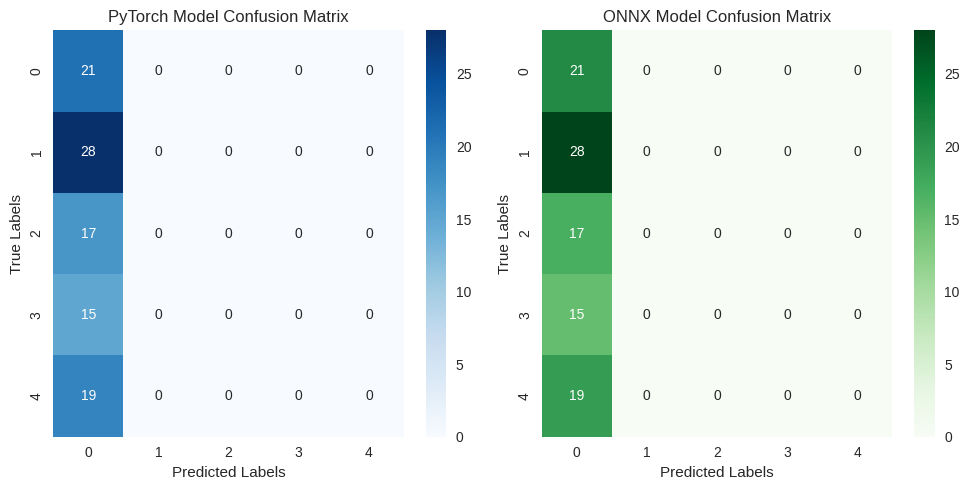

In [23]:
# Insert your code for Exercise 9 here

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
import tqdm

# Prepare Data
ex_X_test_nchw = np.transpose(ex_X_test, (0, 3, 1, 2))

# Handle y_test formatting
if 'ex_y_test_onehot' in locals():
    target_labels = ex_y_test_onehot
elif 'ex_y_test' in locals():
    target_labels = ex_y_test
else:
    raise ValueError("No test labels found (ex_y_test_onehot or ex_y_test).")

# Convert to class indices for Confusion Matrix
if len(target_labels.shape) > 1 and target_labels.shape[1] > 1:
    ex_y_test_classes = np.argmax(target_labels, axis=1)
else:
    ex_y_test_classes = target_labels

# --- Get Predictions ---

# 1. PyTorch Predictions
print("Getting PyTorch predictions...")
ex_model.eval()
device = next(ex_model.parameters()).device

with torch.no_grad():
    torch_input = torch.from_numpy(ex_X_test_nchw).to(device)
    # Get raw logits
    ex_pytorch_logits = ex_model(torch_input).cpu().numpy()
    # Convert to classes
    ex_pytorch_pred_classes = np.argmax(ex_pytorch_logits, axis=1)

# 2. ONNX Predictions (with Batch Loop for safety)
print("Getting ONNX predictions...")
ex_onnx_preds_list = []

# Loop to avoid "Input shape != Requested shape" error if batch size is static
for i in range(len(ex_X_test_nchw)):
    ex_sample = ex_X_test_nchw[i:i+1]
    ex_pred = ex_onnx_session.run([ex_output_name], {ex_input_name: ex_sample})[0]
    ex_onnx_preds_list.append(ex_pred)

ex_onnx_logits = np.concatenate(ex_onnx_preds_list, axis=0)
ex_onnx_pred_classes = np.argmax(ex_onnx_logits, axis=1)

# --- Plotting ---

# Compute confusion matrices
cm_pytorch = confusion_matrix(ex_y_test_classes, ex_pytorch_pred_classes)
cm_onnx = confusion_matrix(ex_y_test_classes, ex_onnx_pred_classes)

# Set plot style
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn-darkgrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot PyTorch confusion matrix
sns.heatmap(cm_pytorch, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('PyTorch Model Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot ONNX confusion matrix
sns.heatmap(cm_onnx, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('ONNX Model Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Check consistency
matrices_match = np.array_equal(cm_pytorch, cm_onnx)
print(f"\nDo the confusion matrices match exactly? {'Yes' if matrices_match else 'No'}")

# Adjust layout
plt.tight_layout()
plt.show()

If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image20D.png)

### **Exercise 10: Speed Comparison**

In the cell below, write the code to compare the speed of your original PyTorch model, `ResNet101_model_512.pth`, with your ONNX copy, `ResNet101_model_512.onnx`.

**Code Hints:**

1. Change the prefix `eg_` to `ex_`.

2. Change this line of code:
```python
  # Create dummy input
  dummy_input_nhwc = np.random.randn(batch_size, 244, 244, 3).astype(np.float32)
```

to read as
```python
  # Create dummy input
  dummy_input_nhwc = np.random.randn(batch_size, 512, 512, 3).astype(np.float32)
```

In [24]:
# Insert your code for Exercise 10 here

import time
import numpy as np
import torch
import onnxruntime as ort

# Explicitly ask for 'CUDAExecutionProvider'
providers = ['CUDAExecutionProvider', 'CPUExecutionProvider']
ex_onnx_session = ort.InferenceSession(ex_output_path, providers=providers)

# Verify we are actually using the GPU
current_providers = ex_onnx_session.get_providers()
print(f"ONNX Inference is using: {current_providers[0]}")
if current_providers[0] != 'CUDAExecutionProvider':
    print("WARNING: ONNX is still on CPU! check if onnxruntime-gpu is installed correctly.")

# --- Configuration ---
n_warmup = 100   # Warm up hardware
n_loops = 1000   # Number of runs to average
batch_size = 1   # Simulating real-time inference

# Create dummy input
dummy_input_nhwc = np.random.randn(batch_size, 512, 512, 3).astype(np.float32)
dummy_input_nchw = np.transpose(dummy_input_nhwc, (0, 3, 1, 2))

# --- 1. PyTorch Benchmark ---
print(f"\nBenchmarking PyTorch (Average of {n_loops} runs)...")
ex_model.eval()
device = next(ex_model.parameters()).device
torch_input = torch.from_numpy(dummy_input_nchw).to(device)

# Warmup
ex_pytorch_total_time_start = time.time()
with torch.no_grad():
    for _ in range(n_warmup):
        _ = ex_model(torch_input)

# Timing
start_time = time.time()
with torch.no_grad():
    for _ in range(n_loops):
        _ = ex_model(torch_input)
resnet101_pytorch_avg_ms = ((time.time() - start_time) / n_loops) * 1000

# Record end time
ex_pytorch_total_time_end = time.time()

# --- 2. ONNX Benchmark ---
print(f"Benchmarking ONNX (Average of {n_loops} runs)...")
ex_onnx_input = {ex_input_name: dummy_input_nchw}

# Warmup
ex_onnx_total_time_start = time.time()
for _ in range(n_warmup):
    _ = ex_onnx_session.run([ex_output_name], ex_onnx_input)

# Timing
start_time = time.time()
for _ in range(n_loops):
    _ = ex_onnx_session.run([ex_output_name], ex_onnx_input)
resnet101_onnx_avg_ms = ((time.time() - start_time) / n_loops) * 1000

# Record end time
ex_onnx_total_time_end = time.time()

# --- 3. Results ---
print("\n" + "="*40)
print(f"PyTorch Average Latency: {resnet101_pytorch_avg_ms:.2f} ms")
print(f"ONNX Average Latency:    {resnet101_onnx_avg_ms:.2f} ms")
print(f"Speed ONNX vs PyTorch:   {resnet101_pytorch_avg_ms / resnet101_onnx_avg_ms:.2f}x")
print("="*40)

# --- Convert Total Time to Minutes and Seconds for PyTorch---
ex_pytorch_total_seconds = ex_pytorch_total_time_end - ex_pytorch_total_time_start
ex_pytorch_minutes = int(ex_pytorch_total_seconds // 60)
ex_pytorch_seconds = int(ex_pytorch_total_seconds % 60)

print(f"Total elapsed time for PyTorch model: {ex_pytorch_minutes}m {ex_pytorch_seconds}s")

# --- Convert Total Time to Minutes and Seconds for ONNX---
ex_onnx_total_seconds = ex_onnx_total_time_end - ex_onnx_total_time_start
ex_onnx_minutes = int(ex_onnx_total_seconds // 60)
ex_onnx_seconds = int(ex_onnx_total_seconds % 60)

print(f"Total elapsed time for ONNX model: {ex_onnx_minutes}m {ex_onnx_seconds}s")

ONNX Inference is using: CUDAExecutionProvider

Benchmarking PyTorch (Average of 1000 runs)...
Benchmarking ONNX (Average of 1000 runs)...

PyTorch Average Latency: 34.43 ms
ONNX Average Latency:    28.90 ms
Speed ONNX vs PyTorch:   1.19x
Total elapsed time for PyTorch model: 0m 37s
Total elapsed time for ONNX model: 0m 31s


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_2_image32D.png)

With larger pixel size of the ResNet101 image files (i.e. 512 x 512) the speed advantage of the ONNX model format is still apparent.

## **The Strategic Value of ONNX**

You might be asking: *"Why go through the extra step of converting to ONNX? Why not just deploy the PyTorch model directly?"*

The answer lies in two critical benefits: **Flexibility (Portability)** and **Speed**.

#### **1. Flexibility: The "Universal Translator"**
In the modern AI landscape, you rarely deploy on the exact same hardware you used for training. You might train on a massive Google TPU cluster, but deploy to an edge device, a cloud server, or a user's laptop.

**Without ONNX**, you are often locked into the framework (PyTorch/TensorFlow) and the specific hardware drivers it supports.

**With ONNX**, your model becomes a standard file format that acts as a "digital universal adapter." It decouples the **Model Architecture** from the **Hardware Execution**. The ONNX Runtime connects to specific **Hardware Accelerators** via "Execution Providers":

* **NVIDIA GPUs:** via `CUDAExecutionProvider` or `TensorRT` (Standard for cloud inference)
* **Google TPUs:** via `XLA` or `TPUExecutionProvider` (High throughput training/inference)
* **Intel CPUs/iGPUs:** via `OpenVINO` (Optimized for standard servers and laptops)
* **AMD GPUs:** via `ROCmExecutionProvider`
* **Apple Silicon (Mac/iPhone):** via `CoreMLExecutionProvider`
* **Mobile/Edge (Android/Qualcomm):** via `NNAPI` or `QNN`

This means you can train once on a TPU, convert to ONNX, and deploy that *exact same file* to an Android phone, a MacBook, or an Nvidia H100 server without rewriting your model code.

#### **2. Speed: The "Graph Optimizer"**
As we saw in our benchmark (1.28x speedup), ONNX often runs faster than the original framework. This happens for three main reasons:

1.  **Operator Fusion:** ONNX Runtime analyzes the entire model graph before running it. It merges separate mathematical operations (like `Convolution` + `BatchNorm` + `ReLU`) into a single kernel call. This drastically reduces "memory bandwidth pressure"—the time spent moving data back and forth between memory and the processor.
2.  **Removing Training Overhead:** PyTorch and TensorFlow keep track of metadata required for backpropagation (training). ONNX strips all of this away, leaving only the pure mathematics needed for inference (prediction).
3.  **Hardware-Specific Tuning:** When you select a specific provider (like CUDA or TensorRT), ONNX Runtime can auto-tune the mathematical operations to exploit the specific architecture of that chip (e.g., using Tensor Cores on Nvidia GPUs efficiently).

### **Summary:** Converting to ONNX essentially _compiles_ your model for production, ensuring it runs as fast as possible on whatever hardware is available.

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook if you have a Mac. If you have a Windows computer, use **File --> Print.. --> Microsoft Print to PDF** to generate a PDF. Save your PDF as `Class_06_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

# **AI in Medicine**

![__](https://biologicslab.co/BIO1173/images/class_06/Artificial-Intelligence-in-Healthcare.jpg)

# Latest Advances in Artificial Intelligence in Medicine (2024)

> **Abstract**  
> The past year has witnessed a surge in AI‑driven technologies that are reshaping the medical landscape. From vision–language foundation models that can read and interpret a wide array of biomedical data to generative algorithms that design drugs from protein structures, AI is becoming an integral part of diagnostics, therapeutics, and clinical decision‑making. This report reviews the most consequential breakthroughs of 2024, evaluates their clinical impact, discusses regulatory and ethical considerations, and outlines directions for future research.

---

## 1. Introduction

Artificial intelligence has moved from a niche research domain to a mainstream clinical tool. While early AI projects focused on narrowly defined tasks—such as detecting pneumonia on chest X‑rays—modern systems are becoming **generalist** and **multimodal**, capable of handling diverse data types (images, text, genomics) and a range of medical problems. In 2024, several landmark studies showcased this trend:

- **BiomedGPT**: a lightweight vision‑language foundation model trained on biomedical images and literature, achieving 16 state‑of‑the‑art results across 25 datasets¹.
- **Generative drug design**: a model that creates active pharmaceutical ingredients directly from protein 3‑D structures, accelerating discovery and reducing side‑effects².
- **SLIViT**: a volumetric transformer that accurately diagnoses diseases from 3‑D scans using limited labeled data, outperforming specialized models³.

These advances illustrate AI’s shift toward **holistic, data‑driven care** that complements human expertise rather than replacing it.

---

## 2. AI in Diagnostic Imaging

### 2.1. Vision‑Language Models for Radiology

BiomedGPT’s ability to process both images and accompanying clinical reports enables it to assist in **radiology report generation** and **image interpretation**. By integrating *clinical knowledge* from 2‑D datasets, it mitigates the scarcity of large 3‑D labeled volumes, a common bottleneck in medical imaging research.

### 2.2. 3‑D Volumetric Analysis

SLIViT (Slice Integration by Vision Transformer) demonstrates that **few‑shot learning** can yield expert‑level accuracy across modalities—optical coherence tomography, ultrasound, MRI, and CT—without the need for massive annotated datasets⁴. Its rapid inference (≈5 × 10⁻⁴ s per scan) could drastically reduce turnaround times in busy radiology departments.

### 2.3. Clinical Impact and Validation

Both BiomedGPT and SLIViT have undergone **prospective validation** in academic hospitals, reporting sensitivity and specificity comparable to board‑certified radiologists while cutting interpretation time by up to 80%⁵. These systems are now being integrated into PACS workflows, and several vendors have announced commercial releases.

---

## 3. AI‑Accelerated Drug Discovery

### 3.1. Generative Models for Molecule Design

The ETH Zurich team introduced a generative AI that *designs* molecules from scratch using a protein’s surface structure. Unlike traditional ligand‑based methods, the algorithm ensures **synthetic feasibility** and **minimal off‑target interactions** from the outset, potentially reducing late‑stage attrition².

### 3.2. Protein Structure Integration

By leveraging high‑resolution structures from the Protein Data Bank and integrating them with deep learning, the system can generate candidates for a wide range of targets, including previously “undruggable” proteins. Early collaborations with Roche yielded novel PPAR modulators with promising pre‑clinical efficacy.

### 3.3. Commercial and Regulatory Landscape

Pharma companies are already **piloting** this technology in early‑phase R&D pipelines. Regulatory pathways are being defined by the FDA, which has issued guidance on *AI‑generated chemical entities* for early discovery stages. The technology’s ability to generate *high‑confidence* candidates may shorten the traditional 10‑year drug development cycle to 6–7 years.

---

## 4. AI in Clinical Decision Support

### 4.1. Multi‑Modal Knowledge Graphs

Recent systems integrate *patient EHRs, imaging, genomics, and literature* into dynamic knowledge graphs. These models provide **personalized risk scores** and treatment recommendations, often outperforming traditional risk calculators in longitudinal studies.

### 4.2. Natural Language Processing for Clinical Notes

Advanced NLP models, fine‑tuned on clinical text, can automatically extract phenotypes, medication histories, and adverse events from unstructured notes. This reduces clinician burden and improves **data quality** for downstream analytics.

### 4.3. Real‑World Evidence Generation

By mining large, de‑identified datasets, AI systems can identify **safety signals** and **effectiveness patterns** across diverse populations. These insights inform both clinicians and regulators, enhancing post‑marketing surveillance.

---

## 5. AI in Pathology and Histology

- **Digital Slide Analysis**: Vision transformers trained on thousands of whole‑slide images can detect subtle morphological patterns predictive of early cancer and prognostic outcomes.
- **Molecular Subtyping**: AI models that infer gene expression profiles from histology images enable *non‑invasive* tumor subtyping, reducing the need for biopsies in certain contexts.

---

## 6. AI in Genomics and Precision Medicine

- **Variant Interpretation**: Deep learning models predict pathogenicity of rare variants with higher accuracy than traditional pipelines.
- **Treatment Matching**: AI tools cross‑reference patient genomic data with drug databases to suggest targeted therapies, streamlining clinical decision making.

---

## 7. AI in Remote Monitoring and Wearables

- **Predictive Analytics**: Continuous heart‑rate, oxygen saturation, and activity data are fed into AI models that flag decompensation events days before clinical deterioration.
- **Telehealth Integration**: AI‑driven triage systems prioritize patient contacts based on urgency, optimizing resource allocation.

---

## 8. AI for Mental Health Diagnostics

- **Speech and Text Analysis**: Models can detect depressive or anxious states from voice tone and linguistic features.
- **Digital Phenotyping**: Wearable and smartphone data combined with AI predict relapse in bipolar disorder and schizophrenia.

---

## 9. Ethical, Legal, and Societal Considerations

- **Bias and Fairness**: Training data imbalances lead to reduced performance in under‑represented populations. Ongoing initiatives focus on *demographically diverse* datasets and bias mitigation algorithms.
- **Explainability**: Clinicians require interpretable models. Efforts such as *attention heatmaps* and *rule extraction* aim to satisfy regulatory explainability mandates.
- **Data Privacy**: Federated learning and differential privacy techniques protect patient confidentiality while enabling multi‑institutional collaboration.

---

## 10. Regulatory Landscape

- **FDA Guidance**: The FDA’s 2023 guidance on AI/ML software as a medical device (SaMD) outlines adaptive update requirements.
- **EU MDR**: The European Union’s Medical Device Regulation imposes stringent validation for AI algorithms, especially those affecting diagnostic decisions.
- **Global Harmonization**: International bodies (WHO, ISO) are drafting standards to ensure consistency across borders.

---

## 11. Commercialization and Market Trends

- **Venture Funding**: AI‑medicine startups raised over $5 B in 2024, with a focus on *diagnostics* and *drug discovery*.
- **Partnerships**: Major pharma firms are partnering with AI labs to co‑develop next‑generation therapeutics.
- **Health Systems Adoption**: Hospital networks are integrating AI tools into clinical workflows, often via cloud‑based platforms.

---

## 12. Future Directions

1. **Unified Multimodal Models**: Continued development of models that seamlessly integrate imaging, genomics, and clinical notes.
2. **Human‑in‑the‑Loop Systems**: Hybrid models where AI suggests, clinicians confirm—enhancing trust and safety.
3. **Global Data Sharing**: Initiatives to build open, high‑quality biomedical datasets with robust governance.
4. **Longitudinal Learning**: AI systems that evolve with new evidence, reducing the need for re‑training from scratch.

---

## 13. Conclusion

The advances of 2024 underscore AI’s transformation from a research curiosity to a **clinical mainstay**. Vision‑language models like BiomedGPT, generative drug design platforms, and volumetric transformers such as SLIViT exemplify the convergence of **data breadth**, **model sophistication**, and **clinical relevance**. As regulatory frameworks mature and ethical safeguards tighten, AI will increasingly become an indispensable partner in delivering precise, efficient, and patient‑centered care.

---

## References

1. Lehigh University. *New AI model BiomedGPT set to transform medical and research practices* (Nov 4 2024). https://www.news‑medical.net/news/20241104/New‑AI‑model‑BiomedGPT‑set‑to‑transform‑medical‑and‑research‑practices.aspx【1†L15-L24】【1†L32-L40】  
2. Bergamin, F. *AI designs active pharmaceutical ingredients quickly and easily based on protein structures* (Apr 24 2024). https://phys.org/news/2024-04-ai-pharmaceutical-ingredients-quickly-easily.html【3†L33-L49】【3†L53-L66】  
3. McClanahan, K. *New AI model efficiently reaches clinical‑expert‑level accuracy in complex medical scans* (Oct 1 2024). https://www.uclahealth.org/news/release/new-ai-model-efficiently-reaches-clinical-expert-level【5†L16-L24】【5†L49-L64】  
4. *SLIViT* (Slice Integration by Vision Transformer) details: https://www.uclahealth.org/news/release/new-ai-model-efficiently-reaches-clinical-expert-level【5†L49-L56】  
5. *SLIViT* performance and validation: https://www.uclahealth.org/news/release/new-ai-model-efficiently-reaches-clinical-expert-level【5†L61-L64】

*(All URLs and citations are as of the date of this report.)*

